In [2]:
# Fency indexing: Access specific elements using a list of indices
import torch

tensor = torch.tensor([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])
indices = torch.tensor([0,2])
print("fancy indexing - specific element - ")
print(tensor[:, indices])

fancy indexing - specific element - 
tensor([[1, 3],
        [4, 6],
        [7, 9]])


In [4]:
# Masked indexing: Access elements based on a boolean mask
mask = tensor > 5
print(mask)
print("Masked indexing - Elements satisfiying condition")
print(tensor[mask])

tensor([[False, False, False],
        [False, False,  True],
        [ True,  True,  True]])
Masked indexing - Elements satisfiying condition
tensor([6, 7, 8, 9])


In [6]:
# Due to inappropriate tensor shapes 

r1 = torch.rand(3,3,1)
r2 = torch.rand(3,3,2)

r3 = r1+r2

print(r3)

tensor([[[0.6463, 1.1604],
         [0.3108, 0.6673],
         [0.5808, 0.8886]],

        [[0.4834, 1.2734],
         [1.0330, 1.0171],
         [0.7522, 0.3877]],

        [[1.2551, 1.2893],
         [0.5980, 0.3471],
         [1.1283, 1.1825]]])


Here's samll sample of mathemetical operations availabe:

In [9]:
r = torch.rand(2,2) - 0.5 * 2 # values between -1 and 1
print('A random matrix, r:\n ', r)

A random matrix, r:
  tensor([[-0.4454, -0.2062],
        [-0.5877, -0.6793]])


In [10]:
# Common math operation are supported:
print('Absolute value of r:\n', torch.abs(r))

Absolute value of r:
 tensor([[0.4454, 0.2062],
        [0.5877, 0.6793]])


## Auto grad for pytorch

In [11]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import math 

In [51]:
a = torch.linspace(0., 2. * math.pi, steps = 25, requires_grad = True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


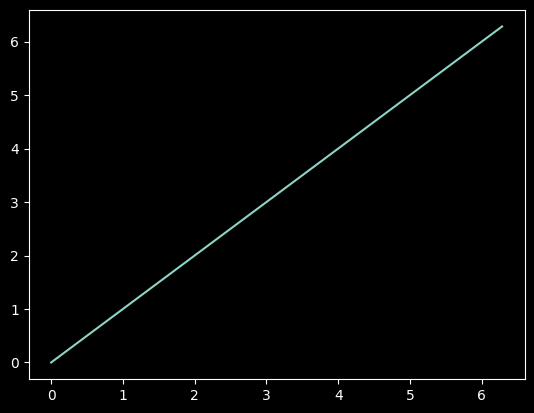

In [52]:
plt.plot(a.detach(), a.detach())
plt.show()

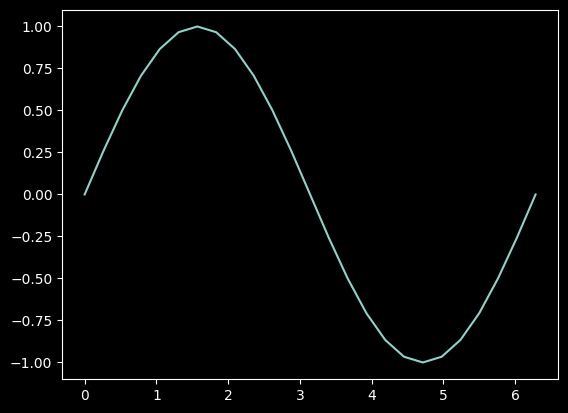

In [53]:
b = torch.sin(a)
plt.plot(a.detach(), b.detach())
plt.show()

In [54]:
b

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)

In [55]:
c = 2*b 
print(c)

d = c+1
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


In [48]:
# tracking the function operation in the pytorch
print('d:\n', d.grad_fn)
print('1:\n', d.grad_fn.next_functions)
print('2:\n', d.grad_fn.next_functions[0][0].next_functions)
print('3:\n', d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print('4:\n', d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)

d:
1:
 ((<MulBackward0 object at 0x767c6b04da80>, 0), (None, 0))
2:
 ((<SinBackward0 object at 0x767c6b04f4f0>, 0), (None, 0))
3:
 ((<AccumulateGrad object at 0x767c6b04e0e0>, 0),)
4:
 ()


In [56]:
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


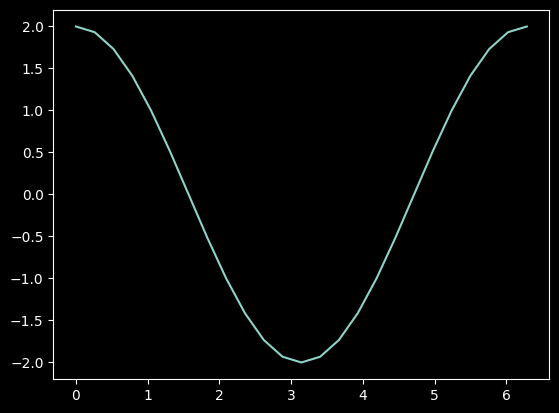

In [57]:
out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach())

### Autograd in Neural Network

In [71]:
batch_size = 16
dim_in = 100
hidden_size = 100
dim_out = 10

In [72]:
# Sample input and output for our model 
torch.manual_seed(42)
X = torch.randn(batch_size, dim_in, requires_grad=False)
y = torch.randn(batch_size, dim_out, requires_grad=False)

In [73]:
print('X shape is:',X.shape)
print('y shape is:', y.shape)

X shape is: torch.Size([16, 100])
y shape is: torch.Size([16, 10])


In [77]:
# Desigining the mode architecture 
class model(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer1 = torch.nn.Linear(100,100)
        self.sigmoid = torch.nn.Sigmoid()
        self.layer2 = torch.nn.Linear(100,10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.sigmoid(x)
        x = self.layer2(x)
        return x
model = model()

### Let's analyze output layers weights 

In [78]:
print(model.layer1.weight.shape)
print(model.layer1.weight[0].shape)
print(model.layer1.weight[0][0:10])

torch.Size([100, 100])
torch.Size([100])
tensor([ 0.0818, -0.0081, -0.0016,  0.0881, -0.0252, -0.0336, -0.0418,  0.0574,
         0.0121, -0.0534], grad_fn=<SliceBackward0>)


### Let's see the changes when we run through one training batch. For loss function, we'll just use between our prediction

In [80]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

prediction = model(X)

loss = (y - prediction).pow(2).sum() # MSE
print(loss)

tensor(171.1441, grad_fn=<SumBackward0>)


### Now let's call ```loss.backward()``` and see what happend:

In [81]:
loss.backward()
print(model.layer1.weight[0][0:10])
print(model.layer1.weight.grad[0][0:10])

tensor([ 0.0818, -0.0081, -0.0016,  0.0881, -0.0252, -0.0336, -0.0418,  0.0574,
         0.0121, -0.0534], grad_fn=<SliceBackward0>)
tensor([-0.1369,  0.1299, -0.8372,  0.3337, -0.1316, -0.2804,  0.3179,  0.4592,
        -0.1283, -0.5059])


In [82]:
print(model.layer1.weight.grad[0][0:10])

for i in range(0,5):
    prediction = model(X)
    loss = (y - prediction).pow(2).sum()
    loss.backward()

print(model.layer1.weight.grad[0][0:10])

# setting gradients to zero
optimizer.zero_grad()

# error since all the gradients are set to none
print(model.layer1.weight.grad[0][0:10])

tensor([-0.1369,  0.1299, -0.8372,  0.3337, -0.1316, -0.2804,  0.3179,  0.4592,
        -0.1283, -0.5059])
tensor([-0.8213,  0.7794, -5.0234,  2.0025, -0.7894, -1.6822,  1.9075,  2.7554,
        -0.7701, -3.0353])


TypeError: 'NoneType' object is not subscriptable